In [7]:
#1  Coin Toss and Dice Roll Simulation
import random

# a. Coin toss simulation
heads_count = 0
total_tosses = 10000
for _ in range(total_tosses):
    if random.choice(['H', 'T']) == 'H':
        heads_count += 1
tails_count = total_tosses - heads_count
prob_heads = heads_count / total_tosses
prob_tails = tails_count / total_tosses
print(f"Experimental probability of heads: {prob_heads}")
print(f"Experimental probability of tails: {prob_tails}")

# b. Two dice roll simulation
sum_7_count = 0
total_rolls = 10000
for _ in range(total_rolls):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7_count += 1
prob_sum_7 = sum_7_count / total_rolls
print(f"Experimental probability of sum 7: {prob_sum_7}")

Experimental probability of heads: 0.5028
Experimental probability of tails: 0.4972
Experimental probability of sum 7: 0.1661


In [8]:
#2  Probability of At Least One "6" in 10 Rolls
import random

def estimate_prob_at_least_one_six(num_trials=10000):
    success_count = 0
    for _ in range(num_trials):
        has_six = False
        for _ in range(10):
            if random.randint(1, 6) == 6:
                has_six = True
                break
        if has_six:
            success_count += 1
    return success_count / num_trials

prob = estimate_prob_at_least_one_six()
print(f"Estimated probability of at least one 6 in 10 rolls: {prob}")

Estimated probability of at least one 6 in 10 rolls: 0.835


In [9]:
#3 Ball Drawing Simulation
import random

colors = ['R'] * 5 + ['G'] * 7 + ['B'] * 8  # 5 red, 7 green, 8 blue
total_draws = 1000
prev_color = None
red_after_blue_count = 0
blue_count = 0
red_count = 0
blue_after_red_count = 0

for _ in range(total_draws):
    current_color = random.choice(colors)
    if prev_color == 'B' and current_color == 'R':
        red_after_blue_count += 1
    if prev_color == 'B':
        blue_count += 1
    if current_color == 'R':
        red_count += 1
    if prev_color == 'R' and current_color == 'B':
        blue_after_red_count += 1
    prev_color = current_color

# a. P(Red | Previous Blue)
if blue_count > 0:
    prob_red_given_blue = red_after_blue_count / blue_count
    print(f"P(Red | Previous Blue): {prob_red_given_blue}")
else:
    print("No previous blue draws.")

# b. Verify Bayes' Theorem: P(Blue | Red) = P(Red | Blue) * P(Blue) / P(Red)
prob_blue = 8 / 20  # Theoretical P(Blue)
prob_red = 5 / 20   # Theoretical P(Red)
prob_blue_given_red_theoretical = (prob_red_given_blue * prob_blue) / prob_red
prob_blue_given_red_sim = blue_after_red_count / red_count if red_count > 0 else 0
print(f"Theoretical P(Blue | Red) via Bayes: {prob_blue_given_red_theoretical}")
print(f"Simulated P(Blue | Red): {prob_blue_given_red_sim}")

P(Red | Previous Blue): 0.2371364653243848
Theoretical P(Blue | Red) via Bayes: 0.3794183445190157
Simulated P(Blue | Red): 0.4340425531914894


In [10]:
#4 Discrete Random Variable Sample
import numpy as np

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]
sample = np.random.choice(values, size=1000, p=probabilities)

empirical_mean = np.mean(sample)
empirical_variance = np.var(sample, ddof=0)  # Population variance
empirical_std = np.std(sample, ddof=0)

print(f"Empirical Mean: {empirical_mean}")
print(f"Empirical Variance: {empirical_variance}")
print(f"Empirical Standard Deviation: {empirical_std}")

Empirical Mean: 2.192
Empirical Variance: 0.615136
Empirical Standard Deviation: 0.7843060627076651


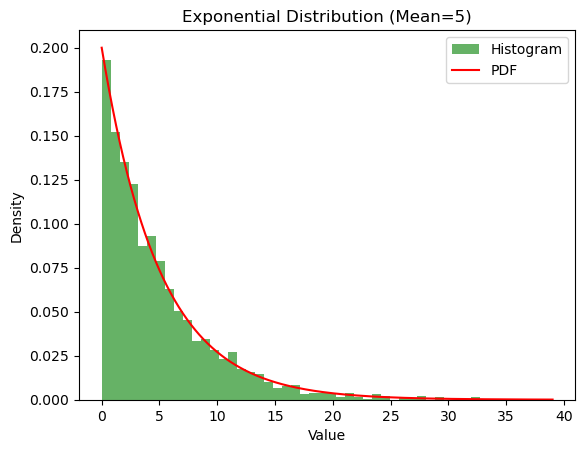

In [11]:
#5   Exponential Distribution Simulation
import numpy as np
import matplotlib.pyplot as plt

# Simulate 2000 samples from exponential with mean 5 (lambda = 1/5)
samples = np.random.exponential(scale=5, size=2000)

# Histogram
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Histogram')

# PDF overlay
x = np.linspace(0, np.max(samples), 1000)
pdf = (1/5) * np.exp(-x / 5)  # PDF: lambda * e^(-lambda x), lambda=1/5
plt.plot(x, pdf, 'r-', label='PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution (Mean=5)')
plt.legend()
plt.show()

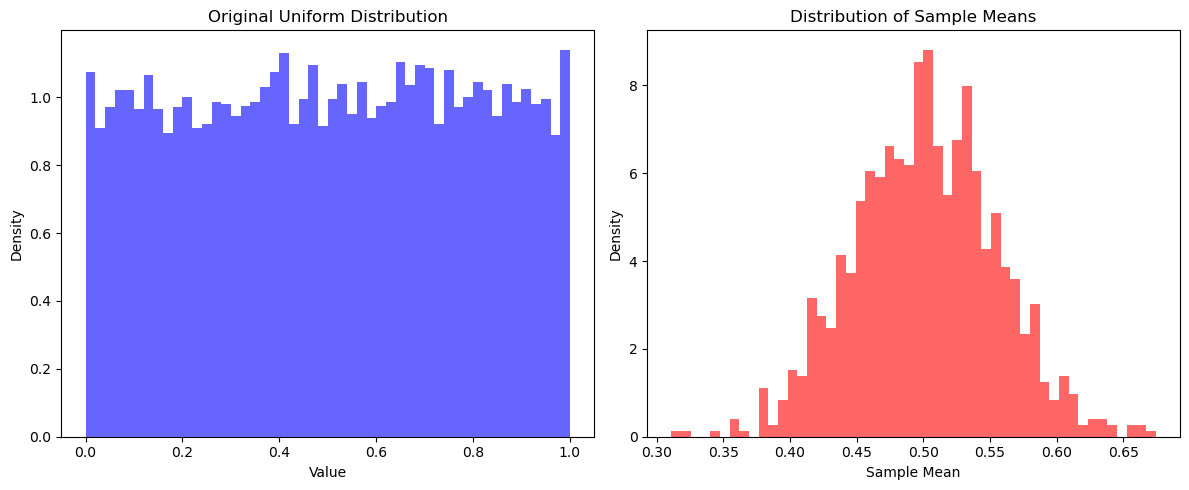

In [12]:
#6 CLT Simulation

import numpy as np
import matplotlib.pyplot as plt

# a. Generate 10,000 random numbers from uniform(0,1)
population = np.random.uniform(0, 1, 10000)

# b. Draw 1000 samples of size n=30, compute sample means
sample_means = []
for _ in range(1000):
    sample = np.random.choice(population, size=30)
    sample_means.append(np.mean(sample))

# c. Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Uniform distribution
ax1.hist(population, bins=50, density=True, alpha=0.6, color='b', label='Uniform Distribution')
ax1.set_title('Original Uniform Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Sample means distribution
ax2.hist(sample_means, bins=50, density=True, alpha=0.6, color='r', label='Sample Means (n=30)')
ax2.set_title('Distribution of Sample Means')
ax2.set_xlabel('Sample Mean')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()